# OpenCV SSD

> ## Image Object Detection

* Pretrained 모델 파일 로드 후 OpenCV 기반 Object Detection 수행 

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. Image File Download

* KIA.jpg 다운로드

In [2]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/image/KIA.jpg

--2023-04-14 01:41:06--  https://raw.githubusercontent.com/rusita-ai/pyData/master/image/KIA.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65805 (64K) [image/jpeg]
Saving to: ‘KIA.jpg’

KIA.jpg             100%[===================>]  64.26K  --.-KB/s    in 0.01s   

2023-04-14 01:41:06 (5.27 MB/s) - ‘KIA.jpg’ saved [65805/65805]



* KIA.jpg 확인

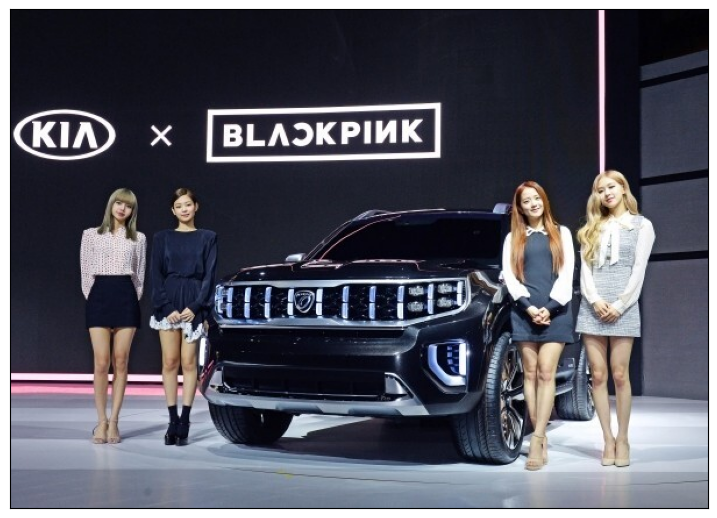

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/KIA.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (9, 9))
plt.imshow(img_rgb)
plt.xticks([])
plt.yticks([])
plt.show()

print('Image Shape:', img.shape)

# II. Object Detection API Download

> ## 1) Pretrained Model Download

* https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API
* http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2017_11_17.tar.gz

* ssd_inception_v2_coco_2017_11_17.tar.gz 다운로드

In [4]:
!wget http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2017_11_17.tar.gz

Image Shape: (429, 600, 3)
--2023-04-14 01:41:08--  http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2017_11_17.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.134.128, 2607:f8b0:400c:c00::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.134.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 278126337 (265M) [application/x-tar]
Saving to: ‘ssd_inception_v2_coco_2017_11_17.tar.gz’

ssd_inception_v2_co 100%[===================>] 265.24M  98.4MB/s    in 2.7s    

2023-04-14 01:41:11 (98.4 MB/s) - ‘ssd_inception_v2_coco_2017_11_17.tar.gz’ saved [278126337/278126337]



* ssd_inception_v2_coco_2017_11_17.tar.gz 압축해제

In [5]:
!tar -xvf ssd_inception_v2_coco_2017_11_17.tar.gz

ssd_inception_v2_coco_2017_11_17/
ssd_inception_v2_coco_2017_11_17/model.ckpt.index
ssd_inception_v2_coco_2017_11_17/model.ckpt.meta
ssd_inception_v2_coco_2017_11_17/frozen_inference_graph.pb
ssd_inception_v2_coco_2017_11_17/model.ckpt.data-00000-of-00001
ssd_inception_v2_coco_2017_11_17/saved_model/
ssd_inception_v2_coco_2017_11_17/saved_model/saved_model.pb
ssd_inception_v2_coco_2017_11_17/saved_model/variables/
ssd_inception_v2_coco_2017_11_17/checkpoint


* 결과 확인
 - frozen_inference_graph.pb

In [6]:
!ls -l /content/ssd_inception_v2_coco_2017_11_17

total 201116
-rw-r----- 1 275875 5000        77 Nov 18  2017 checkpoint
-rw-r----- 1 275875 5000 101987441 Nov 18  2017 frozen_inference_graph.pb
-rw-r----- 1 275875 5000 100214372 Nov 18  2017 model.ckpt.data-00000-of-00001
-rw-r----- 1 275875 5000     18073 Nov 18  2017 model.ckpt.index
-rw-r----- 1 275875 5000   3701354 Nov 18  2017 model.ckpt.meta
drwxr-x--- 3 275875 5000      4096 Nov 18  2017 saved_model


> ## 2) Model Configuration Download

* https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/ssd_inception_v2_coco_2017_11_17.pbtxt

In [7]:
!wget https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/ssd_inception_v2_coco_2017_11_17.pbtxt

--2023-04-14 01:41:20--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/ssd_inception_v2_coco_2017_11_17.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117525 (115K) [text/plain]
Saving to: ‘ssd_inception_v2_coco_2017_11_17.pbtxt’

ssd_inception_v2_co 100%[===================>] 114.77K  --.-KB/s    in 0.02s   

2023-04-14 01:41:20 (5.06 MB/s) - ‘ssd_inception_v2_coco_2017_11_17.pbtxt’ saved [117525/117525]



# III. Model and Configuration load

* cv2.dnn.readNetFromTensorflow()

In [8]:
cv_net = cv2.dnn.readNetFromTensorflow('/content/ssd_inception_v2_coco_2017_11_17/frozen_inference_graph.pb',
                                       '/content/ssd_inception_v2_coco_2017_11_17.pbtxt')

# IV. Class ID Setting

* COCO Dataset

> ## 1) OpenCV - TensorFlow

* SSD

In [9]:
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                   11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                   21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                   31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                   41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                   51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                   61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                   71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                   81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                   91:'hair brush'}


# V. Inference 수행

> ## 1) Object Detection

1. 이미지 전처리
2. Model에 입력
3. Object Detection 수행
4. 결과 이미지에 시각화

person: 0.9938
person: 0.9840
person: 0.9836
person: 0.9708
person: 0.9132


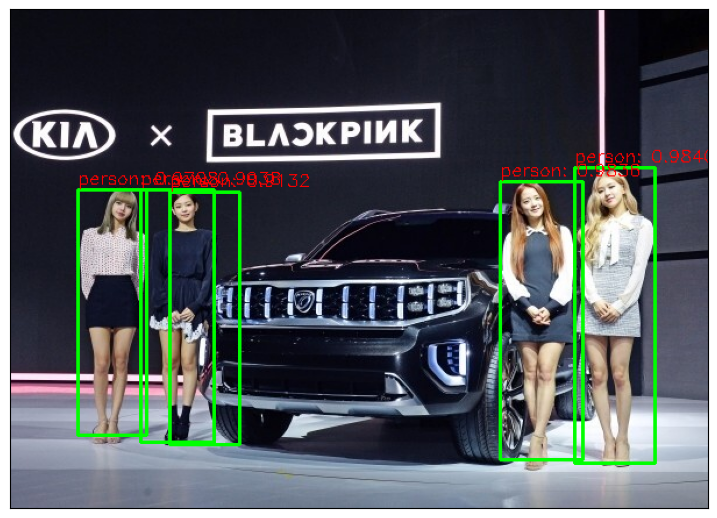

In [10]:
# 1. 이미지 전처리
### 원본 이미지가 Resizing(0~1: Scaling)되어 처리
### Scaling 크기로 Bounding Box 위치가 예측
### 이후 원복을 위한 원본 이미지 shape 정보 저장
rows = img.shape[0]
cols = img.shape[1]

### 결과 출력 생성용 백업 이미지 
draw_img = img.copy()


# 2. Model에 전처리된 이미지 입력
### 이미지 BGR to RGB 변환  
cv_net.setInput(cv2.dnn.blobFromImage(img, 
                                      swapRB = True))


# 3. Object Detection 수행
### cv_out 결과 반환
cv_out = cv_net.forward()


# 4. 결과 이미지에 시각화
### Bounding Box 및 Caption 글자색
green_color = (0, 255, 0)
red_color = (0, 0, 255)

### Detected Object 정보 추출
for detection in cv_out[0, 0, :, :]:
    score = float(detection[2])
    class_id = int(detection[1])
    ### Class Score 0.5 이상만 추출
    if score > 0.5:
        ### Detected Object 원본 이미지 비율로 계산
        left = detection[3] * cols
        top = detection[4] * rows
        right = detection[5] * cols
        bottom = detection[6] * rows

        ### labels_to_names Class_ID
        caption = "{}: {:.4f}".format(labels_to_names[class_id], score)
        print(caption)

        ### Detected Object draw_img에 그리기
        cv2.rectangle(draw_img, 
                      (int(left), int(top)), (int(right), int(bottom)), 
                      color = green_color, 
                      thickness = 2)
        cv2.putText(draw_img, 
                    caption, 
                    (int(left), int(top - 5)), 
                    cv2.FONT_HERSHEY_SIMPLEX, 
                    0.5, 
                    color = red_color, 
                    thickness = 1)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (9, 9))
plt.imshow(img_rgb)
plt.xticks([])
plt.yticks([])
plt.show()

> ## 2) 'cv_out' Information

* Shape

In [11]:
cv_out.shape

(1, 1, 100, 7)

* Information
 - [0]: 의미없음
 - [1]: Class ID
 - [2]: Class Score
 - [3]: x_min
 - [4]: y_min
 - [5]: x_max
 - [6]: y_max

In [12]:
cv_out

array([[[[ 0.0000000e+00,  1.0000000e+00,  9.9383587e-01,
           1.8754163e-01,  3.6210123e-01,  2.9300633e-01,
           8.6871576e-01],
         [ 0.0000000e+00,  1.0000000e+00,  9.8395973e-01,
           8.0974591e-01,  3.1897289e-01,  9.2492902e-01,
           9.0993947e-01],
         [ 0.0000000e+00,  1.0000000e+00,  9.8358315e-01,
           7.0181179e-01,  3.4621555e-01,  8.2017529e-01,
           9.0318269e-01],
         [ 0.0000000e+00,  1.0000000e+00,  9.7084987e-01,
           9.7188070e-02,  3.6221236e-01,  1.9512521e-01,
           8.5539871e-01],
         [ 0.0000000e+00,  1.0000000e+00,  9.1318470e-01,
           2.2918938e-01,  3.6603102e-01,  3.2944059e-01,
           8.7353468e-01],
         [ 0.0000000e+00,  1.0000000e+00,  3.3530745e-01,
           1.3304245e-01,  3.6587352e-01,  2.3535931e-01,
           8.7348861e-01],
         [ 0.0000000e+00,  1.0000000e+00,  2.4590920e-01,
           1.1390126e-01,  1.7500603e-01,  4.6632862e-01,
           8.1705344e-01],

# VI. Define Object Detection Function

> ## 1) get_detected_img( ) 정의

In [13]:
import time

def get_detected_img(cv_net, img_array, score_threshold, use_copied_array = True, is_print = True):
    
    rows = img_array.shape[0]
    cols = img_array.shape[1]
    
    draw_img = None
    if use_copied_array:
        draw_img = img_array.copy()
    else:
        draw_img = img_array
    
    cv_net.setInput(cv2.dnn.blobFromImage(img_array, swapRB = True))
    
    start = time.time()
    cv_out = cv_net.forward()
    
    green_color = (0, 255, 0)
    red_color = (0, 0, 255)

    for detection in cv_out[0, 0, :, :]:
        score = float(detection[2])
        class_id = int(detection[1])
        # score_threshold 이상만 추출
        if score > score_threshold:
            left = detection[3] * cols
            top = detection[4] * rows
            right = detection[5] * cols
            bottom = detection[6] * rows

            caption = "{}: {:.4f}".format(labels_to_names[class_id], score)
            print(caption)

            cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color = green_color, thickness = 2)
            cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color, 1)
    if is_print:
        print('Detection Time:',round(time.time() - start, 2), '초')

    return draw_img

> ## 2) get_detected_img( ) 실행

person: 0.9938
person: 0.9840
person: 0.9836
person: 0.9708
person: 0.9132
Detection Time: 2.16 초


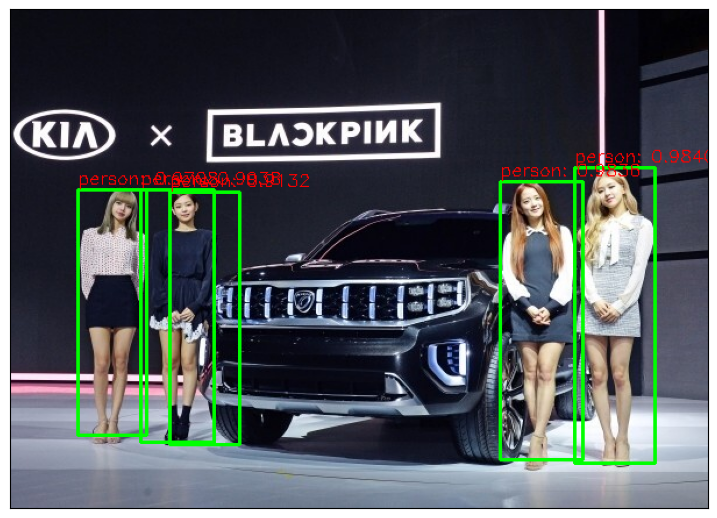

In [14]:
# Image Load
img = cv2.imread('/content/KIA.jpg')


# Model Load
cv_net = cv2.dnn.readNetFromTensorflow('/content/ssd_inception_v2_coco_2017_11_17/frozen_inference_graph.pb',
                                       '/content/ssd_inception_v2_coco_2017_11_17.pbtxt')

# Object Detection
draw_img = get_detected_img(cv_net, img, score_threshold = 0.5, use_copied_array = True, is_print = True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(9, 9))
plt.imshow(img_rgb)
plt.xticks([])
plt.yticks([])
plt.show()

# VII. 추가 Image 

> ## 1) Image Load

In [15]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/image/AS.jpg

--2023-04-14 01:41:32--  https://raw.githubusercontent.com/rusita-ai/pyData/master/image/AS.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 268308 (262K) [image/jpeg]
Saving to: ‘AS.jpg’

AS.jpg              100%[===================>] 262.02K  --.-KB/s    in 0.03s   

2023-04-14 01:41:32 (7.67 MB/s) - ‘AS.jpg’ saved [268308/268308]



> ## 2) Object Detection

image shape: (800, 1200, 3)
person: 0.9780
person: 0.9765
person: 0.9517
person: 0.9399
person: 0.9385
car: 0.9377
car: 0.9299
person: 0.9097
person: 0.9071
person: 0.9012
car: 0.8812
car: 0.8735
person: 0.8512
person: 0.8423
car: 0.8404
person: 0.8324
person: 0.8066
person: 0.8048
person: 0.8035
person: 0.8033
car: 0.7764
person: 0.7599
person: 0.7589
person: 0.7122
person: 0.6998
person: 0.6929
car: 0.6804
person: 0.6790
person: 0.6720
person: 0.6526
person: 0.6313
person: 0.6263
person: 0.6079
person: 0.5985
person: 0.5956
car: 0.5704
person: 0.5671
person: 0.5591
person: 0.5449
person: 0.5438
person: 0.5275
person: 0.5040
Detection Time: 3.46 초


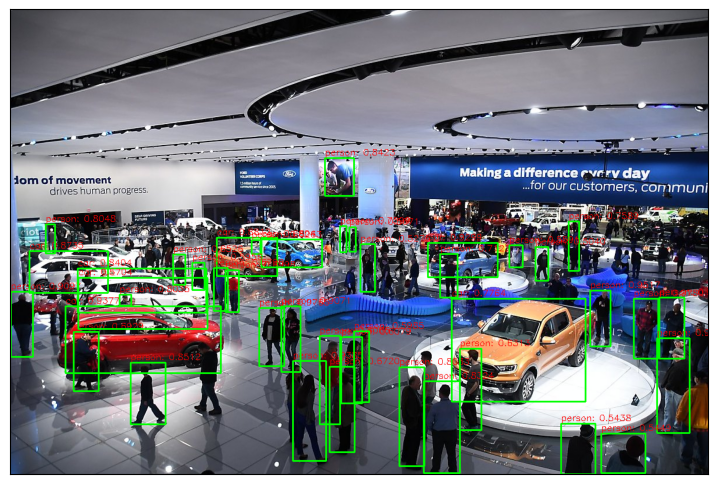

In [16]:
# Image Load
img = cv2.imread('/content/AS.jpg')
print('image shape:', img.shape)

# Model Load
cv_net = cv2.dnn.readNetFromTensorflow('/content/ssd_inception_v2_coco_2017_11_17/frozen_inference_graph.pb',
                                       '/content/ssd_inception_v2_coco_2017_11_17.pbtxt')

# Object Detection
draw_img = get_detected_img(cv_net, img, score_threshold = 0.5, use_copied_array = True, is_print = True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(9, 9))
plt.imshow(img_rgb)
plt.xticks([])
plt.yticks([])
plt.show()

# 
# 
# 
# The End
# 
# 
# 